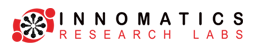

### 1. Importing the relevant libraries

In [1]:
# CODE HERE
# CODE HERE
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score,r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime
%matplotlib inline

In [2]:
# CODE HERE

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [3]:
# CODE HERE
data=pd.read_csv("linear.csv.csv")

#### Let's explore the top 5 rows of the df


In [4]:
# CODE HERE
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

In [5]:
# CODE HERE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [6]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [10]:
data.shape

(4345, 9)

In [11]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [12]:
data.Registration.value_counts()

yes    3947
no      398
Name: Registration, dtype: int64

In [13]:
data.Model.value_counts()

E-Class                199
A6                     172
Vito                   171
Kangoo                 146
Camry                  134
                      ... 
6 Series Gran Coupe      1
250                      1
Mark II                  1
120                      1
CLK 280                  1
Name: Model, Length: 312, dtype: int64

In [14]:
data.Year.value_counts()

2008    419
2007    357
2012    355
2011    319
2013    266
2016    258
2006    211
2005    189
2010    174
2014    167
2004    165
2000    155
2003    155
2001    145
2009    137
2002    127
2015    117
1999    109
1998     80
1997     79
1996     69
1995     45
1994     39
1991     32
1993     27
1992     25
1988     24
1989     23
1987     19
1990     18
1985     13
1986     12
1984      3
1980      3
1979      3
1983      2
1978      2
1969      1
1982      1
Name: Year, dtype: int64

In [15]:
data.Body.value_counts()

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64

In [16]:
data.Brand.value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64

In [17]:
data["Engine Type"].value_counts()

Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: Engine Type, dtype: int64

### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

In [7]:
# CODE HERE
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [8]:
# CODE HERE
data=data.dropna()

### Here i droped all the null values.

In [9]:
data.shape

(4025, 9)

In [10]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [11]:
le=LabelEncoder()
cat_col=data.columns[np.where(data.dtypes=="object")]
#for col in cat_col:
    #data[col]=le.fit_transform(data[col])

In [12]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### 6. Let's check the descriptives without the missing values


In [13]:
# CODE HERE
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [14]:
data.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

In [15]:
# CODE HERE
num_col=data.select_dtypes(include=["int64","float64"]).columns

In [16]:
data.select_dtypes(include=["object"]).columns

Index(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], dtype='object')

(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

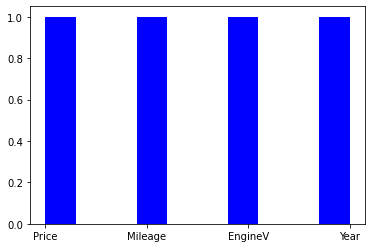

In [17]:
plt.hist(num_col,bins=10,color="blue")

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

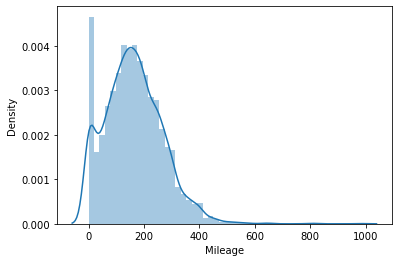

In [18]:

sns.distplot(data.Mileage)


<AxesSubplot:ylabel='Density'>

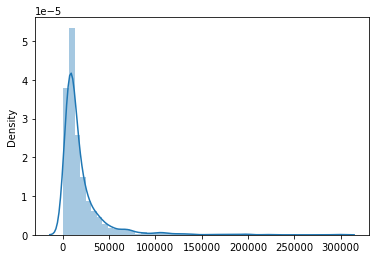

In [19]:
sns.distplot([data.Price])

<AxesSubplot:ylabel='Density'>

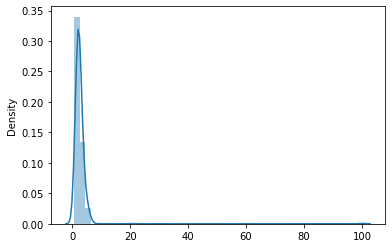

In [20]:
sns.distplot([data.EngineV])

<AxesSubplot:ylabel='Density'>

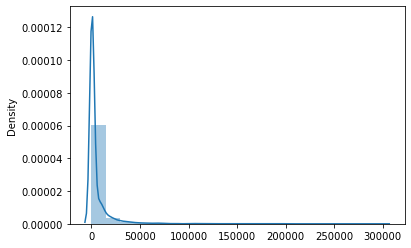

In [21]:
fig=plt.figure()
sns.distplot(data[num_col],bins=20)

<AxesSubplot:ylabel='Density'>

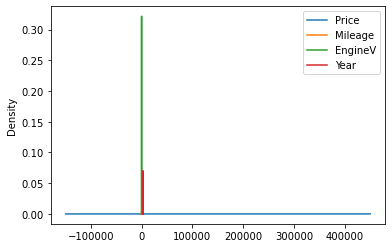

In [22]:
 data.plot.density(bw_method=None, ind=None)

<AxesSubplot:ylabel='Density'>

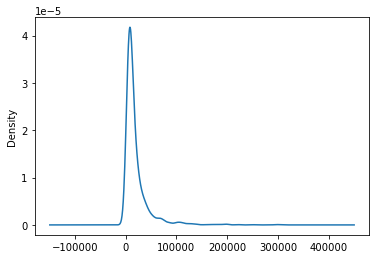

In [23]:
 data["Price"].plot.density(bw_method=None, ind=None)

In [24]:
def numeric_analysis_hist(feature1):
    sns.set_style('whitegrid')    
    plt.figure(figsize=(15,5))
    plt.title(feature1+' Distribution',fontsize = 20) 
    plt.xlabel(feature1 , fontsize = 15)  
    
    dist = sns.distplot(data[feature1],color='g')

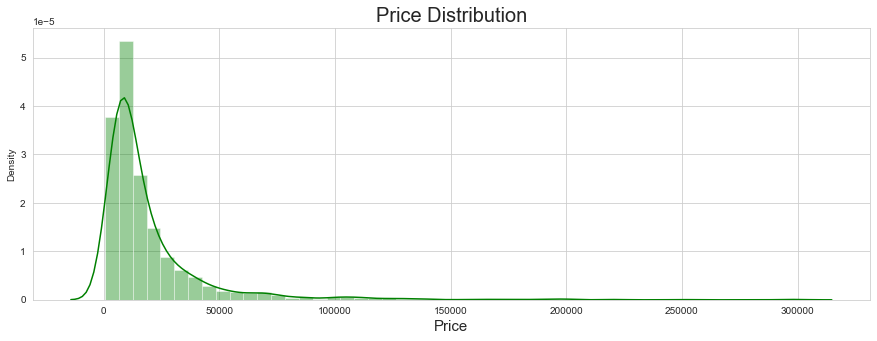

In [25]:
numeric_analysis_hist("Price")

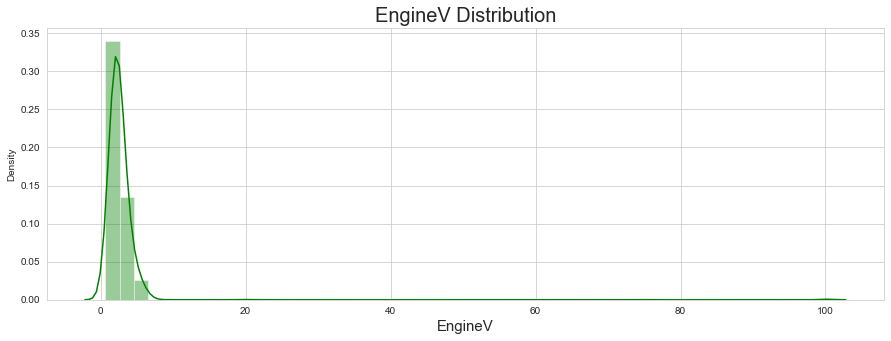

In [26]:
numeric_analysis_hist("EngineV")

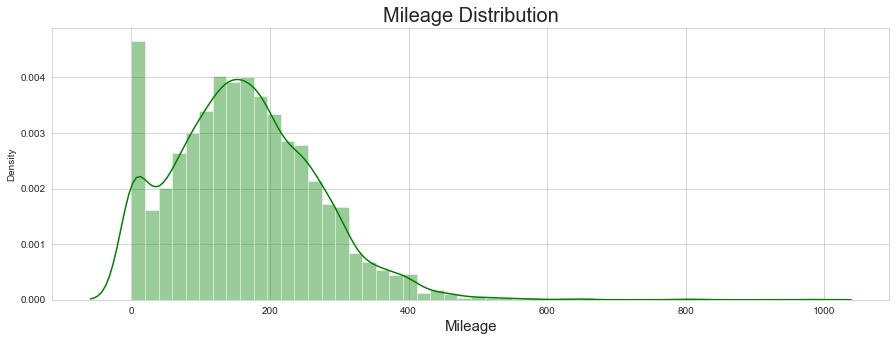

In [27]:
numeric_analysis_hist("Mileage")

### Dealing with outliers
Hint: Use IQR or Z Score

#### 8A. Identify the Outliers which are presented in `Price` Column

In [30]:
def numeric_analysis(feature):
    sns.set_style('whitegrid')
    out_marker = dict(markerfacecolor='yellow',markeredgecolor = 'black', marker='o', markersize = 12)
    plt.figure(figsize=(15,5))
    plt.title(feature+' outliers',fontsize = 20) 
    plt.xlabel(feature , fontsize = 15)  
    
    boxplot = sns.boxplot(data[feature],notch = True,color='skyblue',
                          showmeans=True,
                          flierprops=out_marker,
                          meanprops={ "marker":"o",
                                    "markerfacecolor":"red", 
                                    "markeredgecolor":"black",
                                    "markersize":"8"})       
    

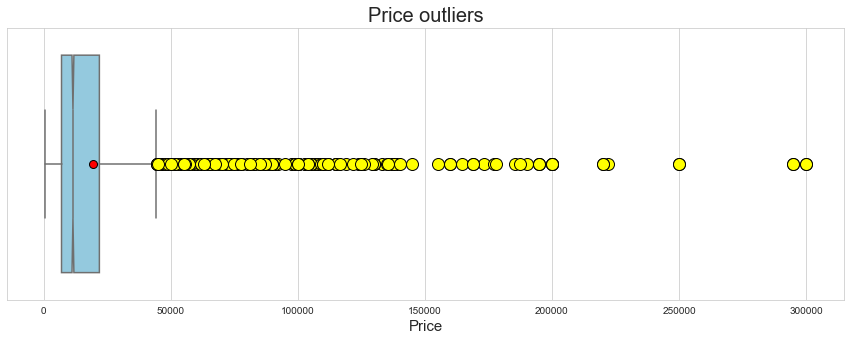

In [31]:
numeric_analysis("Price")

In [32]:
# CODE HERE
min_price,max_price=data.Price.quantile([0.001,0.999])

In [33]:
min_price,max_price

(1101.1999999999998, 249999.976)

In [34]:
data[data.Price<min_price]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
141,Audi,600.0,sedan,112,1.6,Petrol,yes,1980,80
288,Toyota,600.0,sedan,10,1.5,Petrol,yes,1979,Corolla
1592,Renault,999.0,sedan,430,2.0,Gas,yes,1988,25
3608,Renault,800.0,van,200,1.9,Diesel,no,1997,Scenic
3947,Toyota,1100.0,van,140,2.0,Gas,yes,1985,Lite Ace


In [35]:
data[data.Price > max_price]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
1728,Mercedes-Benz,300000.0,sedan,68,6.0,Petrol,yes,2011,S 600
2243,Mercedes-Benz,250000.0,other,6,5.5,Petrol,yes,2016,S 63 AMG
3164,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S-Guard
4101,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S 600
4318,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500


In [36]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [37]:
q1=data.Price.quantile(0.25)
q3=data.Price.quantile(0.75)
q1,q3

(6999.0, 21900.0)

In [38]:
IQR=q3-q1
IQR

14901.0

In [39]:
lower_limit=q1 - 1.5*IQR
upper_limit=q3 + 1.5*IQR
lower_limit,upper_limit

(-15352.5, 44251.5)

In [40]:
data[(data.Price < lower_limit) | (data.Price > upper_limit)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
37,BMW,67500.0,crossover,1,2.5,Diesel,yes,2016,X5
41,Mercedes-Benz,63000.0,crossover,86,5.5,Petrol,yes,2009,G 55 AMG
62,BMW,133000.0,crossover,7,4.4,Petrol,yes,2015,X5 M
64,Mercedes-Benz,50000.0,sedan,240,3.5,Petrol,yes,2006,S 350
...,...,...,...,...,...,...,...,...,...
4318,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500
4322,Toyota,100000.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200
4327,Audi,80999.0,crossover,0,3.0,Diesel,yes,2016,Q7
4331,BMW,45000.0,crossover,80,3.0,Petrol,yes,2011,X6


In [41]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### 8B. Remove the Outliers which are presented in `Price` Column

In [42]:
# CODE HERE
data1=data[(data.Price > lower_limit) & (data.Price < upper_limit)]
data1

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

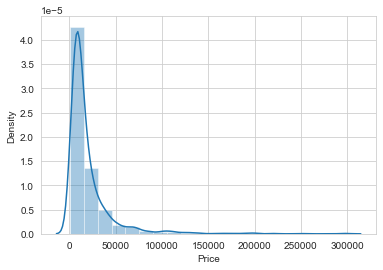

In [44]:
# CODE HERE
sk=sns.distplot(data["Price"],bins=20)

** This price columns distribution is right skewed and meadian is greater than mean**

In [45]:
data.Price.skew

<bound method Series.skew of 0         4200.0
1         7900.0
2        13300.0
3        23000.0
4        18300.0
          ...   
4339     17900.0
4340    125000.0
4341      6500.0
4342      8000.0
4344     13500.0
Name: Price, Length: 4025, dtype: float64>

#### 9A. Same identify and remove the outliers in `Milage` column

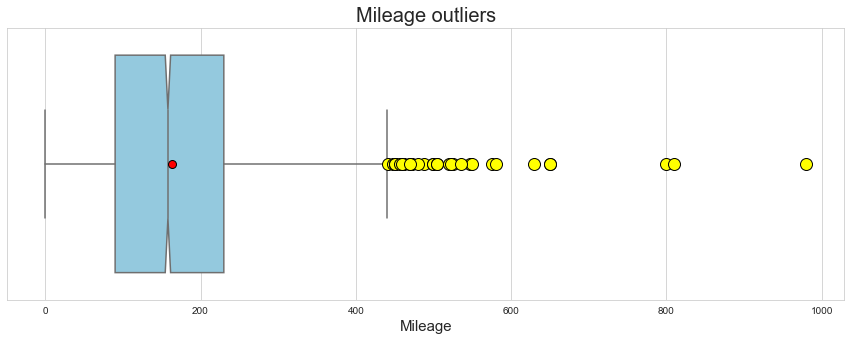

In [46]:
numeric_analysis("Mileage")  # Before removing the outliers

In [47]:
# CODE HERE

q1=data1.Mileage.quantile(0.25)
q3=data1.Mileage.quantile(0.75)
iqr=q3-q1
iqr

130.0

In [48]:
lower_limit=q1 - 1.5*iqr
upper_limit=q3 + 1.5*iqr
lower_limit,upper_limit

(-87.0, 433.0)

In [49]:
data1[(data1.Mileage < lower_limit) | (data1.Mileage > upper_limit)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
258,Volkswagen,2500.0,sedan,488,2.0,Petrol,yes,1991,Passat B3
284,Renault,4900.0,van,472,2.5,Diesel,yes,2000,Master
396,Mercedes-Benz,2650.0,sedan,470,2.0,Gas,yes,1985,190
899,Volkswagen,6500.0,other,547,1.9,Diesel,yes,1998,T4 (Transporter)
922,Volkswagen,5200.0,van,442,2.4,Diesel,yes,1992,T4 (Transporter)
1198,Volkswagen,8700.0,other,520,2.5,Diesel,yes,1999,T4 (Transporter)
1393,Toyota,2700.0,sedan,550,1.6,Gas,yes,1989,Carina
1410,Volkswagen,4900.0,sedan,500,1.9,Diesel,yes,1995,Passat B4
1813,Mercedes-Benz,8500.0,van,630,2.9,Diesel,yes,1998,Sprinter 312


In [50]:
data2=data1[(data1.Mileage > lower_limit) & (data1.Mileage < upper_limit)]

In [51]:
data2

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

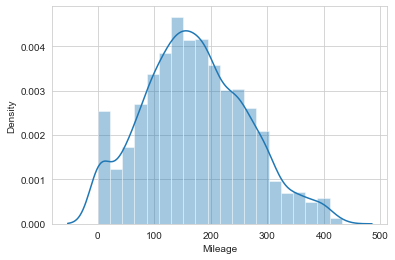

In [52]:
# CODE HERE
sns.distplot(data2["Mileage"],bins=20)


**  This mileage feature is quite normaly distributed 

#### 10A. Identify and remove the outliers from `EngineV` column



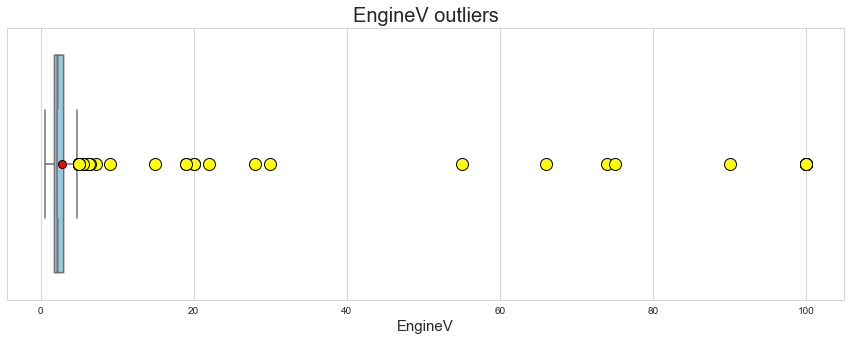

In [53]:
numeric_analysis("EngineV")

In [54]:
# CODE HER.E
q1=data1.EngineV.quantile(0.25)
q3=data1.EngineV.quantile(0.75)
iqr=q3-q1
iqr

0.9999999999999998

In [55]:
# CODE HERE
lower_limitE=q1 - 1.5*iqr
upper_limitE=q3 + 1.5*iqr
lower_limitE,upper_limitE

(0.3000000000000005, 4.299999999999999)

In [56]:
data2[(data2.EngineV < lower_limitE) | (data2.EngineV > upper_limitE)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
14,Toyota,16000.0,crossover,250,4.7,Gas,yes,2001,Land Cruiser 100
33,BMW,28500.0,crossover,160,4.8,Gas,yes,2008,X5
48,Mercedes-Benz,29500.0,sedan,134,5.0,Petrol,yes,2008,S 500
53,Mercedes-Benz,13500.0,sedan,317,5.0,Petrol,yes,2001,S 500
...,...,...,...,...,...,...,...,...,...
4257,Mercedes-Benz,23500.0,sedan,200,5.5,Petrol,yes,2008,S 550
4265,Mercedes-Benz,27500.0,crossover,152,6.3,Petrol,yes,2007,ML 63 AMG
4278,Mercedes-Benz,29500.0,crossover,253,5.0,Petrol,yes,2003,G 500
4297,Mercedes-Benz,24500.0,sedan,163,5.5,Gas,yes,2007,S 550


In [57]:
data3=data2[(data2.EngineV > lower_limitE) & (data2.EngineV < upper_limitE)]

In [58]:
data3

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [59]:
data3.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [60]:
from scipy.stats import kurtosis

#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

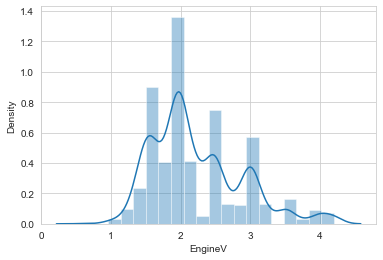

In [61]:
# CODE HERE
sns.distplot(data3.EngineV,bins=20)

 ** Around 709 are  2.0 engines and 549 3.0 engines **

In [62]:
# CODE HERE
data.EngineV.value_counts()

2.00    689
3.00    491
2.50    339
1.60    312
2.20    277
       ... 
2.17      1
1.79      1
1.46      1
4.67      1
0.65      1
Name: EngineV, Length: 72, dtype: int64

#### 10C. Perform Lable & One-Hot Encoding For the Categorical Variable

In [63]:
# CODE HERE
data3.select_dtypes(include=["object"]).columns

Index(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], dtype='object')

In [64]:
data3

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [65]:
data3["Engine Type"].value_counts()

Diesel    1590
Petrol    1209
Gas        529
Other       90
Name: Engine Type, dtype: int64

In [66]:
data3["Body"].value_counts()

sedan        1342
van           586
crossover     532
vagon         372
other         325
hatch         261
Name: Body, dtype: int64

In [67]:
data3["Registration"].value_counts()

yes    3062
no      356
Name: Registration, dtype: int64

In [68]:
data3.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [69]:
reg=pd.get_dummies(data3["Engine Type"],prefix="Engine Type")
data3=pd.concat([data3,reg],1)

In [70]:
data3.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,0,0,0,1
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,1,0,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,0,0,0,1
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,0,0,0,1
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,1,0,0,0


In [71]:
data3["Age of Vehcle"]=data3.Year.apply(lambda x:2021-x)
data3.head()
data3["Registration"]=data3.Registration.apply(lambda x:1 if x=="yes" else 0)
data3.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Age of Vehcle
0,BMW,4200.0,sedan,277,2.0,Petrol,1,1991,320,0,0,0,1,30
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1,1999,Sprinter 212,1,0,0,0,22
3,Audi,23000.0,crossover,240,4.2,Petrol,1,2007,Q7,0,0,0,1,14
4,Toyota,18300.0,crossover,120,2.0,Petrol,1,2011,Rav 4,0,0,0,1,10
7,Audi,14200.0,vagon,200,2.7,Diesel,1,2006,A6,1,0,0,0,15


In [72]:
body=pd.get_dummies(data3["Brand"],prefix="Brand")
car_df=pd.concat([data3,body],1)

In [73]:
le=LabelEncoder()
car_df["Model"]=le.fit_transform(car_df["Model"])

In [74]:
car_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Engine Type_Diesel,...,Engine Type_Other,Engine Type_Petrol,Age of Vehcle,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,BMW,4200.0,sedan,277,2.0,Petrol,1,1991,18,0,...,0,1,30,0,1,0,0,0,0,0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1,1999,206,1,...,0,0,22,0,0,1,0,0,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,1,2007,179,0,...,0,1,14,1,0,0,0,0,0,0
4,Toyota,18300.0,crossover,120,2.0,Petrol,1,2011,181,0,...,0,1,10,0,0,0,0,0,1,0
7,Audi,14200.0,vagon,200,2.7,Diesel,1,2006,53,1,...,0,0,15,1,0,0,0,0,0,0


In [75]:

car_df.drop(["Body","Year","Engine Type","Brand"],axis=1,inplace=True)

# Standardzisng the 3 columns

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [77]:
car_df[['Mileage','EngineV','Model']]=sc.fit_transform(car_df[['Mileage','EngineV','Model']])

# Applying the linear regression

In [78]:
###CODEHERE
x=car_df.drop("Price",axis=1)
y=car_df["Price"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred=model_lr.predict(x_test)

In [583]:
r2_score(y_test,y_pred)

0.6997650026416253

In [79]:
def generate_pred(modelname,model,x_train,x_test,y_train,y_test):


    y_train_pred=model_lr.predict(x_train)
    
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=model_lr.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)


In [80]:
generate_pred("Linear Regression",model_lr,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname Linear Regression
rmse is 5221.133575044434
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname Linear Regression
rmse is 5006.86954219993
Rsqr is  69.98


# Applying stats model

In [92]:
import statsmodels.api as sm
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
8,Engine Type_Petrol,inf
10,Brand_Audi,inf
15,Brand_Toyota,inf
14,Brand_Renault,inf
13,Brand_Mitsubishi,inf
12,Brand_Mercedes-Benz,inf
11,Brand_BMW,inf
16,Brand_Volkswagen,inf
7,Engine Type_Other,inf
6,Engine Type_Gas,inf


In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     520.8
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:57:22   Log-Likelihood:                -34080.
No. Observations:                3418   AIC:                         6.819e+04
Df Residuals:                    3403   BIC:                         6.828e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.23e+04    328.143     37.481      0.000    1.17e+04    1.29e+04
Mileage             -2488.9434    123.403    -20.169      0.000   -2730.895   -2246.992
EngineV              2588.4332    106.690     24.261      0.000    2379.250    2797.616
Registration         6502.9377    314.116     20.702      0.000    5887.063    7118.813
Model                 703.6923    110.785      6.352      0.000     486.481     920.903
Engine Type_Diesel   3830.0377    178.421     21.466      0.000    3480.215    4179.860
Engine Type_Gas      2712.6749    249.451     10.875      0.000    2223.585    3201.765
Engine Type_Other    2674.7165    445.220      6.008      0.000    1801.791    3547.642
Engine Type_Petrol   3081.8219    204.878     15.042      0.000    2680.126    3483.518
Age of Vehcle        -681.3924     18.744    -36.352      0.000    -718.143    -644.642
Brand_Audi           5345.7492    266.794     20.037      0.000    4822.657    5868.842
Brand_BMW            6281.6834    254.156     24.716      0.000    5783.369    6779.998
Brand_Mercedes-Benz  3261.5278    223.527     14.591      0.000    2823.267    3699.789
Brand_Mitsubishi    -1354.9897    285.246     -4.750      0.000   -1914.261    -795.718
Brand_Renault       -3748.7493    272.318    -13.766      0.000   -4282.672   -3214.827
Brand_Toyota         1941.7749    249.708      7.776      0.000    1452.181    2431.369
Brand_Volkswagen      572.2546    205.793      2.781      0.005     168.764     975.745
==============================================================================
Omnibus:                      610.241   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1472.664
Skew:                           0.994   Prob(JB):                         0.00
Kurtosis:                       5.528   Cond. No.                     1.86e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


In [94]:
car_df.columns

Index(['Price', 'Mileage', 'EngineV', 'Registration', 'Model',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Age of Vehcle', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen'],
      dtype='object')

** Age of vehicle have 0.62 multicolinearity and Enigne type petrol have -0.69 multicolinearty**

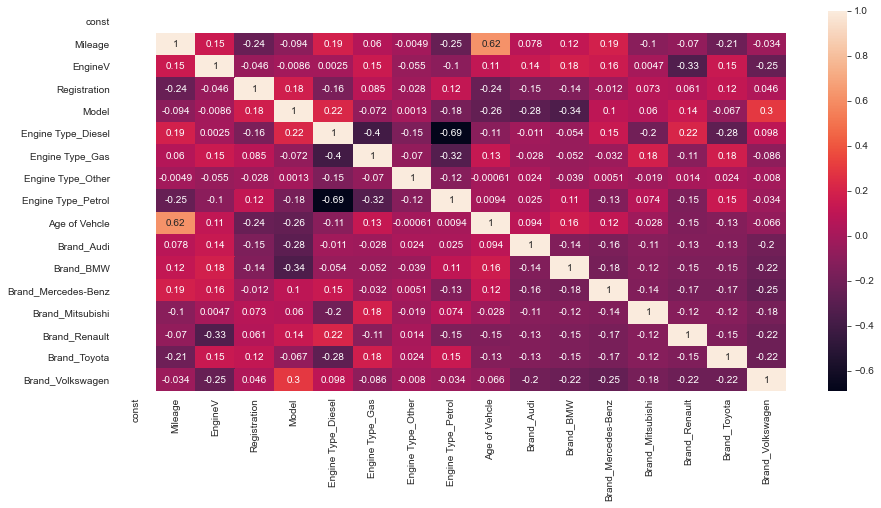

In [95]:
#CODE HERE
plt.figure(figsize=(15,7))
sns.heatmap(x.corr(), annot=True)
plt.show()

#### 11B. Show the variables which are having Multicollinearity.

Hint: VIF Score

In [96]:
#CODE HERE
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
import statsmodels.api as sm
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
8,Engine Type_Petrol,inf
10,Brand_Audi,inf
15,Brand_Toyota,inf
14,Brand_Renault,inf
13,Brand_Mitsubishi,inf
12,Brand_Mercedes-Benz,inf
11,Brand_BMW,inf
16,Brand_Volkswagen,inf
7,Engine Type_Other,inf
6,Engine Type_Gas,inf


** Here i dont get vif score  more than  5% .**

### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [98]:
#CODE HERE
import statsmodels.api as sm


In [99]:
import statsmodels.api as sm
x_sm=sm.add_constant(x)
model=sm.OLS(y,x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     520.8
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:57:42   Log-Likelihood:                -34080.
No. Observations:                3418   AIC:                         6.819e+04
Df Residuals:                    3403   BIC:                         6.828e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.23e+04    328.143     37.481      0.000    1.17e+04    1.29e+04
Mileage             -2488.9434    123.403    -20.169      0.000   -2730.895   -2246.992
EngineV              2588.4332    106.690     24.261      0.000    2379.250    2797.616
Registration         6502.9377    314.116     20.702      0.000    5887.063    7118.813
Model                 703.6923    110.785      6.352      0.000     486.481     920.903
Engine Type_Diesel   3830.0377    178.421     21.466      0.000    3480.215    4179.860
Engine Type_Gas      2712.6749    249.451     10.875      0.000    2223.585    3201.765
Engine Type_Other    2674.7165    445.220      6.008      0.000    1801.791    3547.642
Engine Type_Petrol   3081.8219    204.878     15.042      0.000    2680.126    3483.518
Age of Vehcle        -681.3924     18.744    -36.352      0.000    -718.143    -644.642
Brand_Audi           5345.7492    266.794     20.037      0.000    4822.657    5868.842
Brand_BMW            6281.6834    254.156     24.716      0.000    5783.369    6779.998
Brand_Mercedes-Benz  3261.5278    223.527     14.591      0.000    2823.267    3699.789
Brand_Mitsubishi    -1354.9897    285.246     -4.750      0.000   -1914.261    -795.718
Brand_Renault       -3748.7493    272.318    -13.766      0.000   -4282.672   -3214.827
Brand_Toyota         1941.7749    249.708      7.776      0.000    1452.181    2431.369
Brand_Volkswagen      572.2546    205.793      2.781      0.005     168.764     975.745
==============================================================================
Omnibus:                      610.241   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1472.664
Skew:                           0.994   Prob(JB):                         0.00
Kurtosis:                       5.528   Cond. No.                     1.86e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
x_sm.head()

,const,Mileage,EngineV,Registration,Model,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Age of Vehcle,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,1.0,1.143445,-0.343067,1,-1.595113,0,0,0,1,30,0,1,0,0,0,0,0
1,1.0,2.770847,1.038940,1,1.166438,1,0,0,0,22,0,0,1,0,0,0,0
3,1.0,0.742019,3.035173,1,0.769833,0,0,0,1,14,1,0,0,0,0,0,0
4,1.0,-0.559903,-0.343067,1,0.799211,0,0,0,1,10,0,0,0,0,0,1,0
7,1.0,0.308045,0.731828,1,-1.080994,1,0,0,0,15,1,0,0,0,0,0,0


In [101]:
x_train_sm=sm.add_constant(x_train)

In [102]:
x_test_sm=sm.add_constant(x_test)

In [103]:
y_pred_sm=model.predict(x_train_sm)
# train accuracy
r2_score(y_train,y_pred_sm)

0.6767333864937958

In [104]:
y_test_pred_sm=model.predict(x_test_sm)

# Using OLS model r2 score on test set

In [105]:
r2_score(y_test,y_test_pred_sm)

0.7021543619675731

#### 12B. Explain the Model Evaluation metrics in OLS method.

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

In [651]:
# CODE HEREimport statsmodels.api as sm
x_sm=sm.add_constant(x)
model=sm.OLS(y,x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     520.8
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:36:21   Log-Likelihood:                -34080.
No. Observations:                3418   AIC:                         6.819e+04
Df Residuals:                    3403   BIC:                         6.828e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.23e+04    328.143     37.481      0.000    1.17e+04    1.29e+04
Mileage             -2488.9434    123.403    -20.169      0.000   -2730.895   -2246.992
EngineV              2588.4332    106.690     24.261      0.000    2379.250    2797.616
Registration         6502.9377    314.116     20.702      0.000    5887.063    7118.813
Model                 703.6923    110.785      6.352      0.000     486.481     920.903
Engine Type_Diesel   3830.0377    178.421     21.466      0.000    3480.215    4179.860
Engine Type_Gas      2712.6749    249.451     10.875      0.000    2223.585    3201.765
Engine Type_Other    2674.7165    445.220      6.008      0.000    1801.791    3547.642
Engine Type_Petrol   3081.8219    204.878     15.042      0.000    2680.126    3483.518
Age of Vehcle        -681.3924     18.744    -36.352      0.000    -718.143    -644.642
Brand_Audi           5345.7492    266.794     20.037      0.000    4822.657    5868.842
Brand_BMW            6281.6834    254.156     24.716      0.000    5783.369    6779.998
Brand_Mercedes-Benz  3261.5278    223.527     14.591      0.000    2823.267    3699.789
Brand_Mitsubishi    -1354.9897    285.246     -4.750      0.000   -1914.261    -795.718
Brand_Renault       -3748.7493    272.318    -13.766      0.000   -4282.672   -3214.827
Brand_Toyota         1941.7749    249.708      7.776      0.000    1452.181    2431.369
Brand_Volkswagen      572.2546    205.793      2.781      0.005     168.764     975.745
==============================================================================
Omnibus:                      610.241   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1472.664
Skew:                           0.994   Prob(JB):                         0.00
Kurtosis:                       5.528   Cond. No.                     1.86e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

** Here i dont get p_value over than 0.05 and r2 score is 0.688 and adjusted r2 value is 0.680**

#### 13A. Feature Selection using with Forward Selection

** As i dont have p_value over than 0.05 so i didnot drop any columns here.**

In [126]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()

In [127]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     346.9
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:26:41   Log-Likelihood:                -34753.
No. Observations:                3418   AIC:                         6.953e+04
Df Residuals:                    3406   BIC:                         6.960e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4836.6963    224.314     21.562      0.000    4396.892    5276.500
Mileage            -4446.0178    120.280    -36.964      0.000   -4681.847   -4210.189
EngineV             2737.0595    130.699     20.942      0.000    2480.803    2993.316
Registration_no    -1275.9305    246.220     -5.182      0.000   -1758.685    -793.176
Registration_yes    6112.6267    190.830     32.032      0.000    5738.474    6486.779
Engine Type_Diesel  3558.7657    217.186     16.386      0.000    3132.938    3984.594
Engine Type_Gas    -1173.8411    281.155     -4.175      0.000   -1725.090    -622.592
Engine Type_Other   1613.7986    532.640      3.030      0.002     569.473    2658.124
Engine Type_Petrol   837.9731    233.516      3.589      0.000     380.128    1295.818
Body_crossover      5256.1755    482.121     10.902      0.000    4310.900    6201.451
Body_hatch         -1286.5842    533.042     -2.414      0.016   -2331.699    -241.469
Body_other          1474.5194    490.224      3.008      0.003     513.356    2435.682
Body_sedan           892.6400    391.888      2.278      0.023     124.281    1660.999
Body_van           -1853.5968    431.416     -4.297      0.000   -2699.457   -1007.737
==============================================================================
Omnibus:                      369.998   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.814
Skew:                           0.681   Prob(JB):                    1.38e-166
Kurtosis:                       4.873   Cond. No.                     5.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
###CODEHERE
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred=model_lr.predict(x_test)

LinearRegression()

In [78]:
y_pred=model_lr.predict(x_test)

In [79]:
y_pred

array([ 2.12479299e+04,  2.37689008e+04,  2.38711961e+04,  2.25493946e+04,
        1.41278241e+03,  1.94952408e+04,  4.21378848e+04,  4.33025541e+04,
        3.92485097e+04, -2.96061323e+04,  2.58290783e+04,  2.97614432e+03,
        1.83381859e+04,  5.17303530e+04,  7.11091416e+03,  2.63160691e+04,
        4.06597691e+04,  5.02740787e+02,  3.27320228e+04,  4.05717391e+04,
        3.48193722e+04,  2.93283309e+04,  3.20886702e+04,  9.82761682e+02,
        1.78437023e+04,  1.55000828e+04,  7.15168060e+03,  4.00038171e+03,
        2.14290454e+04,  1.13607239e+04,  3.24581614e+04,  3.65614396e+04,
        4.80980504e+04,  3.92564182e+04,  3.12348392e+04, -6.15933128e+03,
        2.87395975e+04,  3.70179442e+04, -6.03984643e+03,  1.95340630e+04,
        1.98848319e+04,  3.01806402e+04, -6.92202223e+03,  2.99607563e+04,
        1.13050677e+04,  1.34784084e+04, -2.96854310e+03,  2.53802376e+04,
        4.19511452e+03,  3.71594020e+04, -1.18429184e+04,  5.20350617e+04,
       -2.27877366e+04,  

In [136]:
###Interpretations

#### 13B. Feature Selection using with Backward Selection

In [653]:
###CODEHERE
for i in range(0,len(model.pvalues)):
    if (model.pvalues[i] > 0.05):
          print("model.pvalues[i]")
    else:
        print("p value not exceeding 0.05 in this feature")

p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature
p value not exceeding 0.05 in this feature


###Interpretations
** so here you can see that there is no p value greater than 0.05.**

#### 14A. Explain about Assumption of errors and predictors


In [655]:
###CODEHERE
mean_absolute_error(y_test,y_pred)

3809.4314485596497

** Here mean absolute error is 3809.34**

#### 14B. Perform Residual Analysis Give The Interpretations.

In [619]:
#CODE HERE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [620]:
mean_squared_error(y_test,y_pred)

25068742.612609334

In [621]:
mean_absolute_error(y_test,y_pred)

3809.4314485596497

In [622]:
r2_score(y_test,y_pred) #

0.6997650026416253

** Here i am getting around 70% accuracy .My r_squre value is around 70 which is good**

In [147]:
#Intepretations

#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [148]:
###CODEHERE
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [150]:
###CODEHERE
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [151]:
y_pred=model_lr.predict(x_test)

In [152]:
model_lr.intercept_

8447.521714783405

In [153]:
model_lr.coef_

array([    0.        , -4417.42294122,  2803.04363244, -3777.44065056,
        3777.44065056,  2432.20162998, -2445.31877472,   327.11462291,
        -313.99747817,  5227.37109778, -1302.17914886,  1114.05732257,
         786.24324325, -2032.24292565])

In [597]:
def generate_pred(modelname,model,x_train,x_test,y_train,y_test):


    y_train_pred=model.predict(x_train)
    
    # Evaluation metrics for training data set
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname",modelname)
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
# Evaluation metrics for test dataset
    
    y_test_pred=model.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname",modelname)
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)


In [598]:
generate_pred("LinearRegression",model_lr,x_train,x_test,y_train,y_test)  

modelname LinearRegression
rmse is 5221.133575044434
Rsqr is  67.7
modelname LinearRegression
rmse is 5006.86954219993
Rsqr is  69.98


#### 15C. Explain about Ridge Regression and Perform the Ridge Regression

In [657]:
###CODEHERE





ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

**Ridge regression is used to quantify the overfitting of the data through measuring the magnitude of coefficients. To fix the problem of overfitting, we need to balance two things: ... Measure of magnitude of coefficient = ||W||²If Measure of fit of the model is a small value that means model is well fit to the data.**

In [85]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
for i in alpha:
    ridge=Ridge(alpha=i,)
    ridge.fit(x_train,y_train)
    print("alpha value is ",i)
    y_train_pred=ridge.predict(x_train)
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-ridge")
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=ridge.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-ridge")
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)


alpha value is  0.1
------Evaluation metrics for training data set--------
modelname-ridge
rmse is 5221.133780851791
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname-ridge
rmse is 5006.896254249421
Rsqr is  69.98
alpha value is  0.2
------Evaluation metrics for training data set--------
modelname-ridge
rmse is 5221.134397409248
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname-ridge
rmse is 5006.923332614369
Rsqr is  69.98
alpha value is  0.3
------Evaluation metrics for training data set--------
modelname-ridge
rmse is 5221.135423422964
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname-ridge
rmse is 5006.950776071551
Rsqr is  69.98
alpha value is  0.4
------Evaluation metrics for training data set--------
modelname-ridge
rmse is 5221.136857603193
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname-ridge
rmse is 5006.9785834017075
Rsqr is  69.98
alpha value is  0.5
------Evaluation metric

In [86]:
generate_pred("ridge_coeff=0.1",ridge,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname ridge_coeff=0.1
rmse is 5221.133575044434
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname ridge_coeff=0.1
rmse is 5006.86954219993
Rsqr is  69.98


In [87]:

ridge=Ridge(alpha=10)
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [88]:
generate_pred("ridge_coeff=10",ridge,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname ridge_coeff=10
rmse is 5221.133575044434
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname ridge_coeff=10
rmse is 5006.86954219993
Rsqr is  69.98


#### 15D. Explain about Lasso Regression and Perform the Lasso Regression

In [91]:
###CODEHERE
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
for i in alpha:
    lasso=Lasso(alpha=i,)
    lasso.fit(x_train,y_train)
    y_train_pred=lasso.predict(x_train)
    print("alpha value is ",i)
    print("------Evaluation metrics for training data set--------")
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    Rsqr_train=round(r2_score(y_train,y_train_pred)*100,2)
    print("modelname-lasso")
    print("rmse is",rmse_train)
    print("Rsqr is ",Rsqr_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=lasso.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    Rsqr_test=round(r2_score(y_test,y_test_pred)*100,2)
    print("modelname-lasso")
    print("rmse is",rmse_test)
    print("Rsqr is ",Rsqr_test)

   
    print("\n")

alpha value is  0.1
------Evaluation metrics for training data set--------
modelname-lasso
rmse is 5221.1337124910515
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname-lasso
rmse is 5006.905254470971
Rsqr is  69.98


alpha value is  0.2
------Evaluation metrics for training data set--------
modelname-lasso
rmse is 5221.134124830883
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname-lasso
rmse is 5006.941283551858
Rsqr is  69.98


alpha value is  0.3
------Evaluation metrics for training data set--------
modelname-lasso
rmse is 5221.134812063861
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname-lasso
rmse is 5006.97762943575
Rsqr is  69.98


alpha value is  0.4
------Evaluation metrics for training data set--------
modelname-lasso
rmse is 5221.13577418988
Rsqr is  67.7
-------Evaluation metrics for test dataset--------
modelname-lasso
rmse is 5007.014292115754
Rsqr is  69.97


alpha value is  0.5
------Evaluation 

**LASSO regression is an example of regularized regression. Regularization is one approach to tackle the problem of overfitting by adding additional information, and thereby shrinking the parameter values of the model to induce a penalty against complexity. The 3 most popular approaches to regularized linear regression are the so-called Ridge Regression, Least Absolute Shrinkage and Selection Operator (LASSO) and Elastic Net method.**

### Give the Conclusions about the Model fits for What you Observe.

### Interpretations
** From this Model evaluation i got to find that all the models like OLS,logistic,ridge and lasso give the same accuray of around 70 % and when i did feature scaling in some features but not affect much **